# 💾 Data Preparation

This notebook applies the following preprocesing steps to our dataset: 
1. Dealing with missing values
2. Dealing with duplicates
3. Dealing with outliers
4. Dealing with categorical data
5. Partitioning a data set
6. Feature scaling

We start by loading our dependencies and our dataset

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns

df = pd.read_csv('../data/raw_dataset.csv')

# Toggle between scaling and not scaling
feature_scale = True

print("Total # of Observations: ", df.shape[0])

Total # of Observations:  14893


### 1. Drop Missing Values ❓

In [141]:
df.dropna(inplace=True)
df.drop(columns=["duration_ms", "time_signature"], inplace=True)
print("Total # of Observations After Dropping NaN: ", df.shape[0])

Total # of Observations After Dropping NaN:  14426


### 2. Duplicates 🔁

In [142]:
df.drop_duplicates(subset=['id'], inplace=True)
df.drop_duplicates(subset=['preview_url'], inplace=True)
print("Total # of Observations After Dropping Duplicate Id's and Preview URL's: ", df.shape[0])

Total # of Observations After Dropping Duplicate Id's and Preview URL's:  3930


### 3. Outliers 📉
Reorder columns to collect categorical features to determine outliers of numerical features

In [143]:
df  = df[['id', 'preview_url', 'genre', 'key', 'mode', 'artist_genre'] + [c for c in df if c not in ['id', 'preview_url', 'genre', 'key', 'mode', 'artist_genre']]]
df.head()

,id,preview_url,genre,key,mode,artist_genre,danceability,energy,loudness,speechiness,...,zero_cross_Mean,zero_cross_Std,spect_centroid_Mean,spect_centroid_Std,spect_contrast_Mean,spect_contrast_Std,spect_bw_Mean,spect_bw_Std,spect_rolloff_Mean,spect_rolloff_Std
0,3HiFEoic67xzOhd1gBgDhg,https://p.scdn.co/mp3-preview/29adf28c40ff86d1...,Classical,8,0,"['early romantic era', 'classical', 'polish cl...",0.263,0.00668,-31.999,0.0442,...,0.035736,0.004833,553.828031,68.326282,26.475809,9.458472,577.293114,106.449409,754.141560,172.531552
4,1QxMIioUmAxh7nlhdQuQvd,https://p.scdn.co/mp3-preview/e8bb64944740497a...,Classical,1,0,"['baroque', 'italian baroque', 'german orchest...",0.131,0.29500,-14.984,0.0373,...,0.075824,0.026013,1592.985455,298.940066,26.947806,12.021978,1908.268818,223.255037,3287.724781,689.092733
5,0v80sWJ3dm75znzL0tFE3F,https://p.scdn.co/mp3-preview/455bbe4a6ba0c770...,Classical,3,1,"['post-romantic era', 'classical', 'classical ...",0.319,0.00923,-27.739,0.0729,...,0.045088,0.010032,615.586006,120.385355,26.886519,9.486294,628.388049,120.735672,942.237454,224.890917
9,1bab3chhaj7hG2WlJSJ8ei,https://p.scdn.co/mp3-preview/26f8e65b2d15d33c...,Classical,9,1,"['german baroque', 'baroque', 'early music', '...",0.272,0.09400,-23.598,0.0486,...,0.104465,0.054294,1767.838437,445.588360,28.439711,12.216375,1821.414893,289.254597,3391.462669,824.045920
10,14kuP1ZLPfsI2ARQjQna1I,https://p.scdn.co/mp3-preview/a4f788af9902ae5f...,Classical,1,1,"['early romantic era', 'italian classical pian...",0.365,0.00187,-28.623,0.0499,...,0.035600,0.011238,527.413148,65.446814,24.255939,10.850121,871.769863,213.066716,663.617992,111.242069


Drop rows with values in a column outside 3.5 standard deviations of the mean

In [144]:
# Drop Outliers
for col in df.columns[7:]:
    column = df[col]
    mean = column.mean()
    std = column.std()
    outliers = (column < mean - 3.5 * std) | (column > mean + 3.5 * std)
    print(col, ":", df[outliers].shape[0], "outliers")
    df = df[~outliers]
print("Number of Observations After Dropping Outliers", df.shape[0])


energy : 0 outliers
loudness : 37 outliers
speechiness : 42 outliers
acousticness : 0 outliers
instrumentalness : 0 outliers
liveness : 62 outliers
valence : 0 outliers
tempo : 4 outliers
mfcc_1Mean : 12 outliers
mfcc_1Std : 20 outliers
mfcc_2Mean : 7 outliers
mfcc_2Std : 2 outliers
mfcc_3Mean : 12 outliers
mfcc_3Std : 5 outliers
mfcc_4Mean : 13 outliers
mfcc_4Std : 4 outliers
mfcc_5Mean : 11 outliers
mfcc_5Std : 5 outliers
mfcc_6Mean : 10 outliers
mfcc_6Std : 2 outliers
mfcc_7Mean : 6 outliers
mfcc_7Std : 3 outliers
mfcc_8Mean : 6 outliers
mfcc_8Std : 3 outliers
mfcc_9Mean : 8 outliers
mfcc_9Std : 2 outliers
mfcc_10Mean : 5 outliers
mfcc_10Std : 6 outliers
mfcc_11Mean : 6 outliers
mfcc_11Std : 6 outliers
mfcc_12Mean : 3 outliers
mfcc_12Std : 7 outliers
mfcc_13Mean : 11 outliers
mfcc_13Std : 6 outliers
chroma_1Mean : 0 outliers
chroma_1Std : 4 outliers
chroma_2Mean : 0 outliers
chroma_2Std : 3 outliers
chroma_3Mean : 3 outliers
chroma_3Std : 4 outliers
chroma_4Mean : 2 outliers
chroma_

### 4. Categorical Data 📦

In [145]:
# Extract and Encode Target Feature
encoder = LabelEncoder()
genre = df['genre']
df['genre'] = encoder.fit_transform(genre)
genre_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(genre_mapping)
  

{'Classical': 0, 'Country': 1, 'Hip-Hop': 2, 'Metal': 3, 'Pop': 4, 'RnB': 5}


In [146]:
# One Hot Encoding Key
keys_encoded = pd.get_dummies(df['key'], prefix="key", dtype='int')
df = pd.concat([df, keys_encoded], axis=1)
df.drop(columns=["key"], inplace=True)

In [147]:
# Column Vectorizing Artist Genre
cvz = CountVectorizer(max_features=13, stop_words='english')
artist_genre_encoded = cvz.fit_transform(df['artist_genre'])
artist_genre_df = pd.DataFrame(artist_genre_encoded.todense(), columns=["artist_genre_" + name for name in cvz.get_feature_names_out()])
df = pd.concat([df.reset_index(drop=True), artist_genre_df.reset_index(drop=True)], axis=1)
df.drop(columns=["artist_genre"], inplace=True)

In [148]:
# Move Genre column to the end for easy splitting during the training phase
df  = df[[c for c in df if c not in ['genre']] + ['genre']]
df.head()

,id,preview_url,mode,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,artist_genre_country,artist_genre_dance,artist_genre_hip,artist_genre_hop,artist_genre_metal,artist_genre_pop,artist_genre_rap,artist_genre_rock,artist_genre_trap,genre
0,1QxMIioUmAxh7nlhdQuQvd,https://p.scdn.co/mp3-preview/e8bb64944740497a...,0,0.1310,0.2950,-14.984,0.0373,0.847,0.0259,0.1250,...,0,0,0,0,0,0,0,0,0,0
1,4iKDC45B59uK5wnbhT89xS,https://p.scdn.co/mp3-preview/657b58b744f123bf...,0,0.1390,0.1570,-23.703,0.0381,0.930,0.9280,0.1040,...,0,0,0,0,0,0,0,0,0,0
2,3dVSbqD6xVMXfhrp7qkf9J,https://p.scdn.co/mp3-preview/18d1cbd19506832d...,0,0.2460,0.1710,-16.687,0.0437,0.983,0.7490,0.0939,...,0,0,0,0,0,0,0,0,0,0
3,18laJGila9r4QnwnTA2Uhu,https://p.scdn.co/mp3-preview/2c33e237f63bbb6f...,1,0.0997,0.0527,-21.418,0.0393,0.990,0.7450,0.0735,...,0,0,0,0,0,0,0,0,0,0
4,0eZ5iL9gq8eeXEeKXbL7Ej,https://p.scdn.co/mp3-preview/24c6809ac6bd47fc...,0,0.0632,0.0360,-31.784,0.0447,0.908,0.9100,0.1130,...,0,0,0,0,0,0,0,0,0,0


### 5. Partitioning 🧩

In [149]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1:], test_size=0.2, random_state=152, shuffle=True, stratify=df.iloc[:,-1:])
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

### 6. Feature Scaling 📐

In [150]:
# Feature Scaling
min_max = MinMaxScaler()

scale_all_cols = ['danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'mfcc_1Mean', 'mfcc_1Std', 'mfcc_2Mean',
       'mfcc_2Std', 'mfcc_3Mean', 'mfcc_3Std', 'mfcc_4Mean', 'mfcc_4Std',
       'mfcc_5Mean', 'mfcc_5Std', 'mfcc_6Mean', 'mfcc_6Std', 'mfcc_7Mean',
       'mfcc_7Std', 'mfcc_8Mean', 'mfcc_8Std', 'mfcc_9Mean', 'mfcc_9Std',
       'mfcc_10Mean', 'mfcc_10Std', 'mfcc_11Mean', 'mfcc_11Std', 'mfcc_12Mean',
       'mfcc_12Std', 'mfcc_13Mean', 'mfcc_13Std', 'chroma_1Mean',
       'chroma_1Std', 'chroma_2Mean', 'chroma_2Std', 'chroma_3Mean',
       'chroma_3Std', 'chroma_4Mean', 'chroma_4Std', 'chroma_5Mean',
       'chroma_5Std', 'chroma_6Mean', 'chroma_6Std', 'chroma_7Mean',
       'chroma_7Std', 'chroma_8Mean', 'chroma_8Std', 'chroma_9Mean',
       'chroma_9Std', 'chroma_10Mean', 'chroma_10Std', 'chroma_11Mean',
       'chroma_11Std', 'chroma_12Mean', 'chroma_12Std', 'tonal_1Mean',
       'tonal_1Std', 'tonal_2Mean', 'tonal_2Std', 'tonal_3Mean', 'tonal_3Std',
       'tonal_4Mean', 'tonal_4Std', 'tonal_5Mean', 'tonal_5Std', 'tonal_6Mean',
       'tonal_6Std', 'zero_cross_Mean', 'zero_cross_Std',
       'spect_centroid_Mean', 'spect_centroid_Std', 'spect_contrast_Mean',
       'spect_contrast_Std', 'spect_bw_Mean', 'spect_bw_Std',
       'spect_rolloff_Mean', 'spect_rolloff_Std']
       
if feature_scale:
    X_train[scale_all_cols] = min_max.fit_transform(X_train[scale_all_cols])
    X_test[scale_all_cols] = min_max.transform(X_test[scale_all_cols])

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [151]:
# Convert to CSV
folder = "../data" + ("_without_scaling" if not feature_scale else "")
df_train.to_csv(folder + "/train.csv", index=False)
df_test.to_csv(folder + "/test.csv", index=False)

### 7. Data Visualization 📊

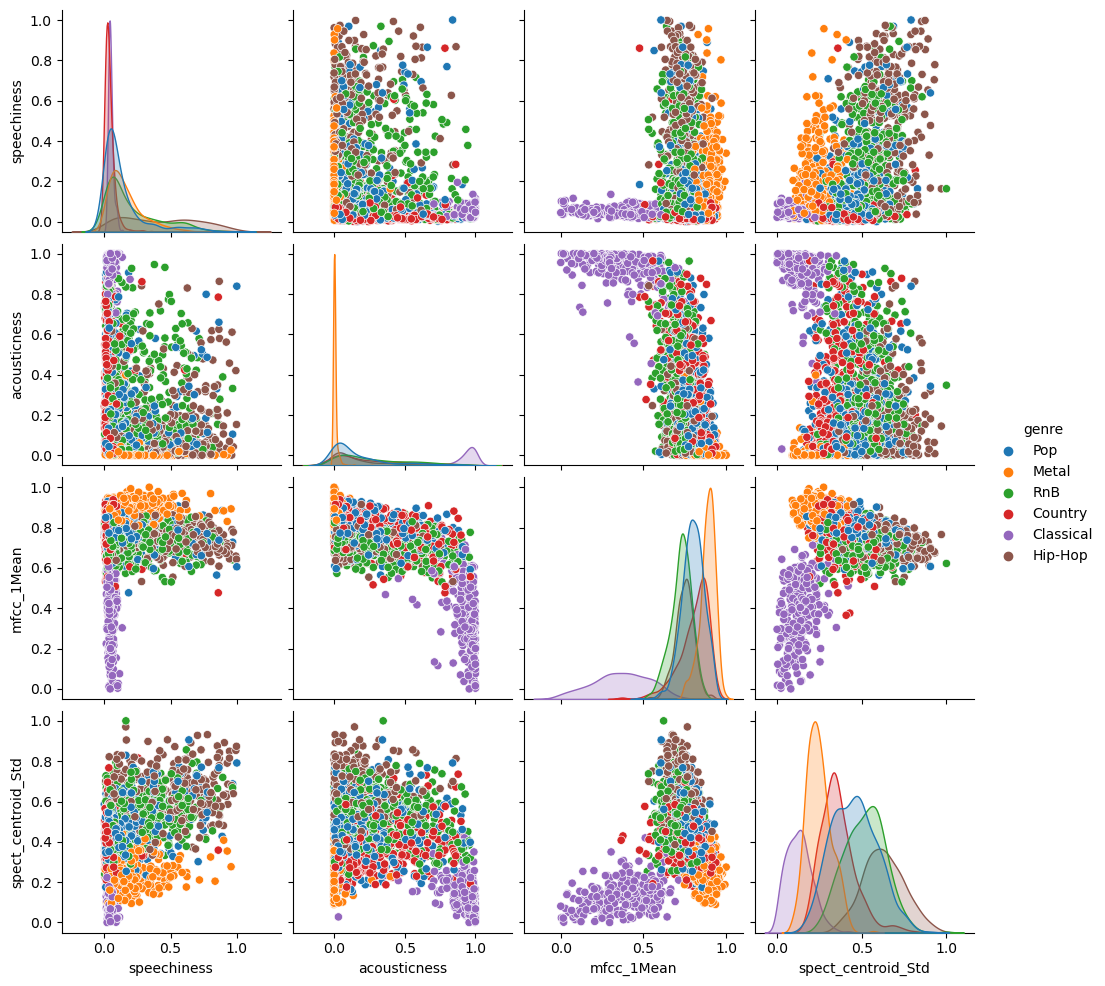

In [152]:
encoding_to_label = {0:'Classical', 1: 'Country', 2: 'Hip-Hop', 3: 'Metal', 4: 'Pop', 5: 'RnB'}
df_train['genre'] = df_train['genre'].replace(encoding_to_label)
sns.pairplot(df_train, x_vars=["speechiness", "acousticness", "mfcc_1Mean", "spect_centroid_Std"], y_vars=["speechiness", "acousticness", "mfcc_1Mean", "spect_centroid_Std"], hue='genre')

<Axes: title={'center': 'Histogram of Loudness'}, ylabel='Frequency'>

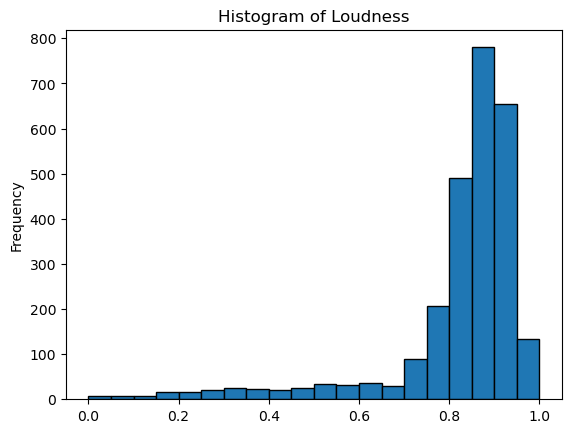

In [153]:
df_train['loudness'].plot(kind="hist", title="Histogram of Loudness", ylabel="Frequency", xlabel="Loudness", bins=20, edgecolor='black')

<Axes: title={'center': 'Histogram of First MFCC Mean'}, ylabel='Frequency'>

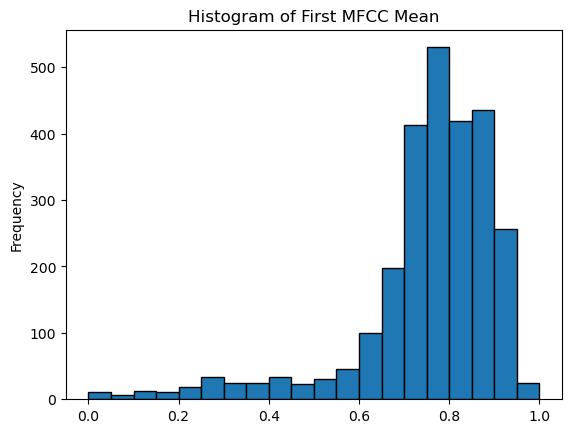

In [154]:
df_train['mfcc_1Mean'].plot(kind="hist", title="Histogram of First MFCC Mean", ylabel="Frequency", xlabel="First MFCC Mean", bins=20, edgecolor='black')